# Parallel Cellular Algorithms and Programs:

Parallel Cellular Algorithms are inspired by the functioning of biological cells that
operate in a highly parallel and distributed manner. These algorithms leverage the
principles of cellular automata and parallel computing to solve complex optimization
problems efficiently. Each cell represents a potential solution and interacts with its
neighbors to update its state based on predefined rules. This interaction models the
diffusion of information across the cellular grid, enabling the algorithm to explore
the search space effectively. Parallel Cellular Algorithms are particularly suitable for
large-scale optimization problems and can be implemented on parallel computing
architectures for enhanced performance.

# Pseudocode

1. Define the optimization problem:
    - Define the objective function f(x) to be minimized or maximized.
    - Set the bounds for the decision variables.

2. Initialize parameters:
    - Define grid dimensions (rows, columns).
    - Set the neighborhood structure (e.g., Moore or Von Neumann).
    - Specify the number of iterations.

3. Initialize population:
    - Generate initial positions of cells randomly within the bounds.

4. Evaluate fitness:
    - Calculate the fitness of each cell using f(x).

5. Iterate until stopping criteria are met:
    For t = 1 to Max_Iter:
        For each cell in the grid:
            - Identify neighbors based on the neighborhood structure.
            - Calculate the new state of the cell based on:
                - Neighbor states.
                - Predefined update rules.
        - Recalculate fitness of all cells.

6. Output:
    - Track and return the best solution and corresponding fitness.


In [1]:
import numpy as np

def parallel_cellular_algorithm(objective_function, grid_size, bounds, max_iter, neighborhood="Moore"):
    rows, cols = grid_size
    lb, ub = bounds

    # Initialize grid with random positions
    grid = np.random.uniform(lb, ub, (rows, cols))
    fitness_grid = np.full((rows, cols), float("inf"))
    best_solution = None
    best_score = float("inf")

    def get_neighbors(row, col):
        if neighborhood == "Moore":
            # Include all 8 neighbors (diagonal + adjacent)
            neighbors = [
                ((row + dr) % rows, (col + dc) % cols)
                for dr in [-1, 0, 1] for dc in [-1, 0, 1]
                if not (dr == 0 and dc == 0)
            ]
        elif neighborhood == "Von Neumann":
            # Include only up, down, left, right neighbors
            neighbors = [
                ((row + dr) % rows, (col + dc) % cols)
                for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]
            ]
        return neighbors

    # Main optimization loop
    for iteration in range(max_iter):
        for row in range(rows):
            for col in range(cols):
                # Evaluate current fitness
                cell_value = grid[row, col]
                fitness = objective_function(cell_value)
                fitness_grid[row, col] = fitness

                # Track the best solution
                if fitness < best_score:
                    best_score = fitness
                    best_solution = cell_value

                # Update state based on neighbors
                neighbors = get_neighbors(row, col)
                neighbor_values = [grid[r, c] for r, c in neighbors]
                grid[row, col] = np.clip(
                    np.mean(neighbor_values) + 0.1 * np.random.randn(), lb, ub
                )

    return best_solution, best_score

# Objective function (example: Sphere function)
def sphere_function(x):
    return x**2

# Usage example
grid_size = (5, 5)
bounds = (-10, 10)
max_iter = 100
best_solution, best_score = parallel_cellular_algorithm(sphere_function, grid_size, bounds, max_iter)
print(f"Best Solution: {best_solution}, Best Score: {best_score}")


Best Solution: 7.174250427487237e-05, Best Score: 5.14698691963008e-09


Application: Image Smoothing

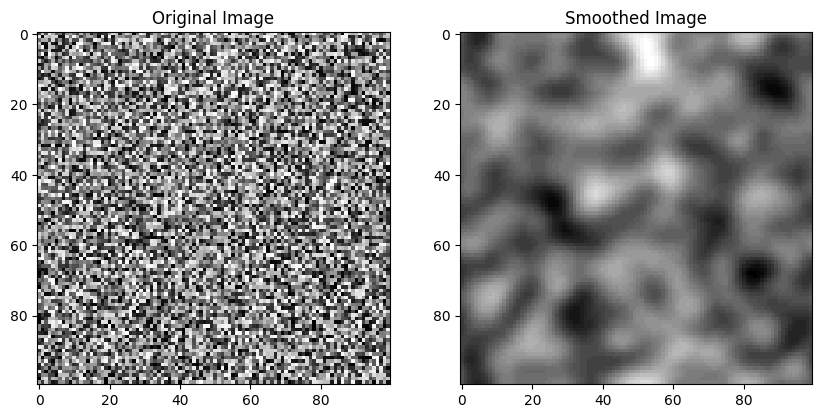

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Objective function for image smoothing
def smoothing_fitness(pixel_value, neighbors):
    # Minimize the difference between the pixel and the mean of its neighbors
    return abs(pixel_value - np.mean(neighbors))

def parallel_cellular_image_smoothing(image, max_iter, neighborhood="Moore"):
    rows, cols = image.shape
    smoothed_image = image.copy()

    def get_neighbors(row, col):
        if neighborhood == "Moore":
            # Include all 8 neighbors (diagonal + adjacent)
            neighbors = [
                ((row + dr) % rows, (col + dc) % cols)
                for dr in [-1, 0, 1] for dc in [-1, 0, 1]
                if not (dr == 0 and dc == 0)
            ]
        elif neighborhood == "Von Neumann":
            # Include only up, down, left, right neighbors
            neighbors = [
                ((row + dr) % rows, (col + dc) % cols)
                for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]
            ]
        return neighbors

    # Optimization loop
    for _ in range(max_iter):
        for row in range(rows):
            for col in range(cols):
                neighbors = get_neighbors(row, col)
                neighbor_values = [smoothed_image[r, c] for r, c in neighbors]
                smoothed_image[row, col] = np.mean(neighbor_values)

    return smoothed_image

# Load and preprocess the image
image = np.random.randint(0, 256, (100, 100))  # Example random noise image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

# Apply Parallel Cellular Image Smoothing
max_iter = 10
smoothed_image = parallel_cellular_image_smoothing(image, max_iter)

# Display results
plt.subplot(1, 2, 2)
plt.title("Smoothed Image")
plt.imshow(smoothed_image, cmap='gray')
plt.show()
